In [26]:
#Import related libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [35]:
#Generate A_claims
A_claims = np.random.poisson(lam=2, size=50)
print(A_claims)

[3 1 3 3 4 3 1 1 1 5 0 2 5 2 2 1 1 0 0 1 0 4 2 0 2 4 4 1 2 1 3 1 3 2 4 1 4
 0 2 1 2 1 3 2 2 4 4 1 1 2]


[4 2 1 0 1 1 1 4 1 2 1 1 4 3 1 2 2 4 4 4 1 2 0 4 4 1 1 1 0 0 1 1 3 2 4 1 1
 0 2 0 3 1 1 2 4 0 2 1 2 1 2 1 1 1 1 1 1 1 2 0 0 1 2 3 1 0 3 1 0 1]


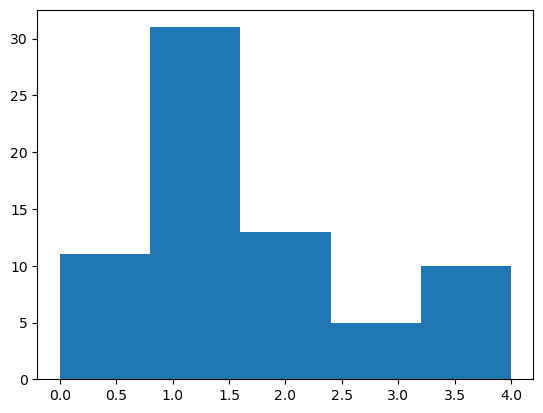

In [72]:
#Generate B_claims
xk = np.array([0, 1, 2, 3, 4])
pk = np.array([0.2, 0.4, 0.2, 0.1, 0.1])
custm = stats.rv_discrete(name='custm', values=(xk,pk))
B_claims = custm.rvs(size=70)
print(B_claims)

#Plot histogram
count, bins, ignored = plt.hist(B_claims, 5, density=False)

In [75]:
#Run a trial simulation model
no_runs = 20000
A_sold = 50
B_sold = 70
A_price = 270
B_price = 210
A_fixed = 50
B_fixed = 45
A_compn = 50
B_compn = 40
A_revenue = A_sold*A_price
B_revenue = B_sold*B_price
A_tfc = A_sold*A_fixed
B_tfc = B_sold*B_fixed

#Additional lines
##Create arrays to store profit and mean profit
profit_arr = np.zeros(no_runs)
mean_profit_arr = np.zeros(no_runs)


for i in range(no_runs):
    #Determine no. of claims per customer for Product A
    A_claims = np.random.poisson(lam=2, size=A_sold)
    #Determine no. of claims per customer for Product B
    B_claims = custm.rvs(size=B_sold)
    
    #Determine total no. of claims for each product
    A_claims_total = np.sum(A_claims)
    B_claims_total = np.sum(B_claims)
    
    #Determine the compensation cost for each product
    A_compn_total = A_compn*A_claims_total
    B_compn_total = B_compn*B_claims_total
    
    #Determine the messenger cost for Product A
    if A_claims_total <= 100:
        A_messg = A_claims_total*15
    else:
        A_messg = (100*15) + (A_claims_total-100)*18
    
    #Determine the messenger cost for Product A
    if B_claims_total <= 100:
        B_messg = B_claims_total*10
    else:
        B_messg = (100*10) + (B_claims_total-100)*14
    
    #Determine profit for each product
    A_profit = A_revenue - (A_tfc + A_compn_total + A_messg)
    B_profit = B_revenue - (B_tfc + B_compn_total + B_messg)
    
    #Determine total profit
    profit_total = A_profit + B_profit
    
    #Additional lines
    ##Create profit and mean profit over runs
    profit_arr[i] = profit_total
    mean_profit_arr[i] = np.mean(profit_arr[:i+1])
    
print('Average profit over ' + str(i+1) + ' runs: $' + str(np.mean(profit_arr)))

Average profit over 20000 runs: $10761.99175


In [25]:
print('run no.' + str(i+1))
print('Total no. of claims for Product A: ' + str(A_claims_total))
print('Total no. of claims for Product B: ' + str(B_claims_total))
print('Total compensation cost for Product A: ' + str(A_compn_total))
print('Total compensation cost for Product B: ' + str(B_compn_total))
print('Total messenger cost for Product A: ' + str(A_messg))
print('Total messenger cost for Product B: ' + str(B_messg))
print('Profit for Product A: ' + str(A_profit))
print('Profit for Product B: ' + str(B_profit))
print('Total profit: ' + str(profit_total) + '\n')

run no.20000
Total no. of claims for Product A: 98
Total no. of claims for Product B: 104
Total compensation cost for Product A: 4900
Total compensation cost for Product B: 4160
Total messenger cost for Product A: 1470
Total messenger cost for Product B: 1056
Profit for Product A: 4630
Profit for Product B: 6334
Total profit: 10964



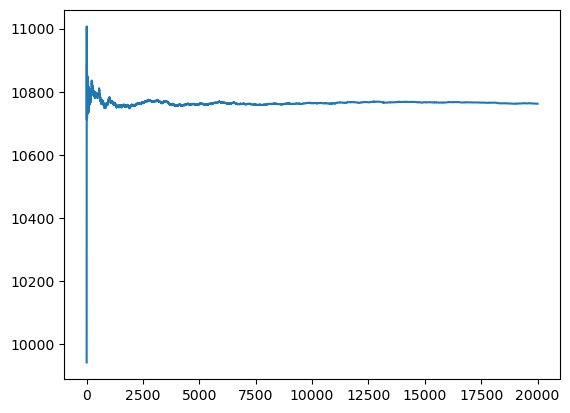

In [77]:
#Plot the mean profit over the runs
plt.plot(mean_profit_arr)
plt.show()

Object `density` not found.
downside risk: 9337.8
mean: 10761.99175
upside risk: 12130.0


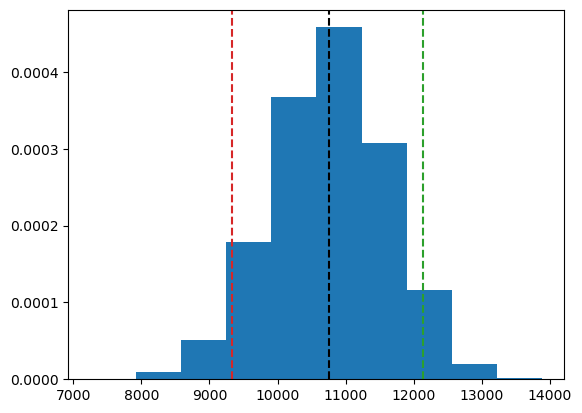

In [76]:
# Plot the distribution of outputs
count, bins , ignored = plt.hist(profit_arr, density = True)
?density
# Calculate the downside and upside risks
downside = np.percentile(profit_arr, 5)
upside = np.percentile(profit_arr, 95)
ss_mean = np.mean(profit_arr)
print('downside risk: ' + str(downside))
print('mean: ' + str(ss_mean))
print('upside risk: ' + str(upside))

# Plot the critical values
plt.axvline(x=downside, color='tab:red', linestyle='--')
plt.axvline(x=ss_mean, color='black', linestyle='--')
plt.axvline(x=upside, color='tab:green', linestyle='--')